In [1]:
import numpy as np
import random
from genetic_algorithm import Genetic_Algorithm as ga

In [2]:
# Set general parameters
chromosome_length = 100
population_size = 10
maximum_generation = 10
best_score_progress = [] # Tracks progress

In [3]:
# Create starting population
population = ga.create_starting_population(population_size, chromosome_length)

In [4]:
population.shape

(10, 100)

In [5]:
# Display best score in starting population
scores = ga.calculate_fitness(population)
best_score = np.max(scores)/chromosome_length * 100
print ('Starting best score, % target: ',best_score)

Starting best score, % target:  97.0


In [6]:
# Add starting best score to progress tracker
best_score_progress.append(best_score)

In [7]:
# Now we'll go through the generations of genetic algorithm
num_generation = 0
while(True):
    num_generation += 1
    flag = 1
    
    # Create an empty list for new population
    new_population = np.array([]).reshape(0,100)
    
    
    # Create new popualtion generating two children at a time
    for i in range(0,population_size-1,2):
        parent_1 = population[i]
        parent_2 = population[i+1]
        child_1, child_2 = ga.two_point_crossover(parent_1, parent_2)
        family = np.array([parent_1,parent_2,child_1,child_2])
        family_fitness = ga.calculate_fitness(family)
        #print(family_fitness,flag)
        stopping_criterion  = ga.check_stopping_criterion(family_fitness)
        if(stopping_criterion == False):
            flag=0
        best_two = np.argsort(family_fitness)[::-1][:2]
        best_in_family = family[best_two]
        new_population =  np.vstack((new_population, best_in_family))
        
    # Replace the old population with the new one
    population = np.array(new_population)
    
    # Score best solution, and add to tracker
    scores = ga.calculate_fitness(population)
    best_score = np.max(scores)/chromosome_length * 100
    best_score_progress.append(best_score)
    if(best_score==100 or flag==1):
        break
    else:
        print(f'Generation : {num_generation}, score : {best_score}')
# GA has completed required generation
print ('End best score, percent target: %.1f' %best_score)

[65.0, 42.0, 60.0, 47.0] 1
[33.0, 39.0, 35.0, 37.0] 1
[43.0, 40.0, 39.0, 44.0] 1
[65.0, 85.0, 69.0, 81.0] 0
[97.0, 82.0, 83.0, 96.0] 0
Generation : 1, score : 97.0
[65.0, 60.0, 65.0, 60.0] 1
[39.0, 37.0, 37.0, 39.0] 1
[44.0, 43.0, 44.0, 43.0] 1
[85.0, 81.0, 85.0, 81.0] 1
[97.0, 96.0, 97.0, 96.0] 1
End best score, percent target: 97.0


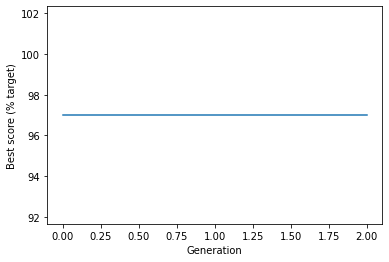

In [9]:
# Plot progress
import matplotlib.pyplot as plt
plt.plot(best_score_progress)
plt.xlabel('Generation')
plt.ylabel('Best score (% target)')
plt.show()